## Estimation of Demand Function for Train Travel

Group Name: The Jedi Council

Group Members: Remy Masbatin, Canjie Shen, Jiang Jinjing, Philippine Gallot, Johnny Shollaj

The scope of the given project would be to estimate the demand function of train travel, given the data in the Data-GP1.csv file. In order to accomplish that feat, we would need to follow through these steps:

$\bullet$ Perform exploratory data analysis, visualization, data cleaning and feature engineering.
<br>
$\bullet$ Check for endogeneity in our given variables (Measurement Error, Self-Selection, Simultaneity etc).
<br>
$\bullet$ Determination of Endogenous and Exogenous variables
<br>
$\bullet$ Drop features which do not contribute to the overall demand function and / or add new combined features which would enhance the performance of the function
<br>
$\bullet$ Conduct the IV Weak Test, Hausman Test, and the 2SLS Regression

### Part 1: Perform exploratory data analysis, visualization, data cleaning and feature engineering.

After importing the data, we check for NULL values, see the distribution of numerical and categorical values as well as for potential first-hand biases we discern initially. 

In [87]:
from IPython.display import Image

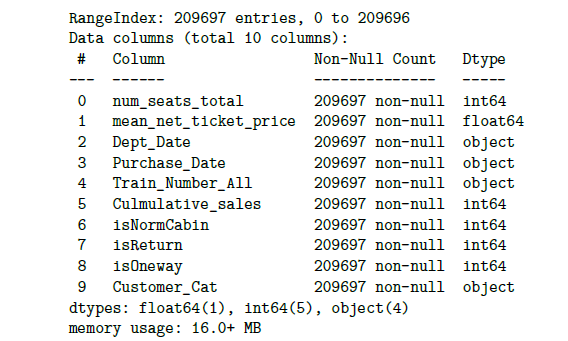

In [8]:
Image(filename="C:/Users/User/Documents/Data1.png", width=410)

The initial changes we commited included converting the departing dates and purchase dates to the right data type, removing the solo outlier in Category D, and revisualizing the findings after the cleansing.

#### 1.2 Correcting the Underlying Bias of Prices

Notably, the column ‘Culmulative_sales’ counts how many times the ticket has been bought since
it was available.
This means that: - If ‘Culmulative_sales’ is equal to 1, this means the ticket was sold just once
(i.e. the customer did not cancel the reservation, and it was not then bought by somebody else).
In this case, ‘mean_net_ticket_price’ is calculated on just one ticket price and it is equal to
the initial price of the ticket; - If ‘Culmulative_sales’ is superior to 1, this means the ticket was
sold several times (i.e. the first customer who bought the ticket did cancel the reservation, and
it was then bought by somebody else, and this may have happened several times). In this case,
‘mean_net_ticket_price’ is calculated on several ticket prices and it is not equal to the initial price
of the ticket.
Should we keep the data where ‘Culmulative_sales’>1, this would mean that the
mean_ticket_price would be biased. Indeed, assuming that the price of the ticket increases
as we get closer to the departure date. Hence when someone buys a ticket later than when
it was first bought, the price of the ticket will be higher than its initial price.

We prefer to get rid of the lines where ‘Culmulative_sales’>1 primarily to avoid this bias,
and it is possible because we have a sufficient number of lines where ‘Culmulative_sales’=1 (we still have over 29k lines to use in our model).

#### 1.3 Creation of a new feature

Since we have the Dept_Date as well Purchase_Date, we can find the number of days from purchase
to departure, and further explore its relation to mean_net_ticket_price. Lets check its distribution in the visualization below:

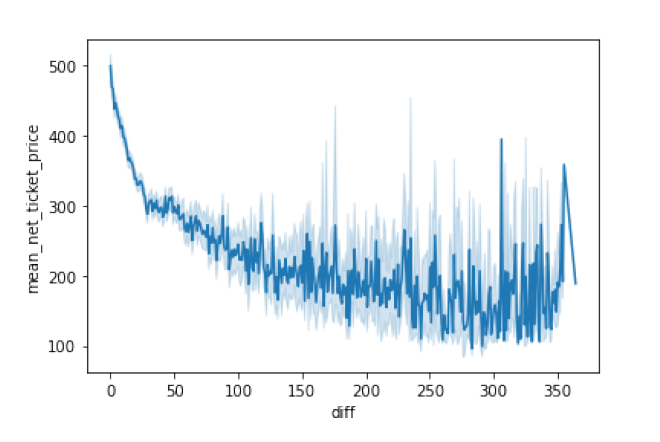

In [9]:
Image(filename="C:/Users/User/Documents/Data2.png", width=410)

We can see that the price increases sharply as we get closer to the departure date.
Although there is a lot of noise for tickets purchased a long time before the departure date, the
trend is overall clearly downward-sloping.

#### 1.4 Exploration of ‘isNormCabin’

After dropping an outlier in category D, we assume a generally normal distribution among mean ticket price per train number category. We can also observe that the price of normal cabins is almost always below the price of the other cabins. This must signify that the ‘non-normal’ cabins are ‘premium’ cabins, which are more likely to be occupied by category A customers like we show below (see 1.5).

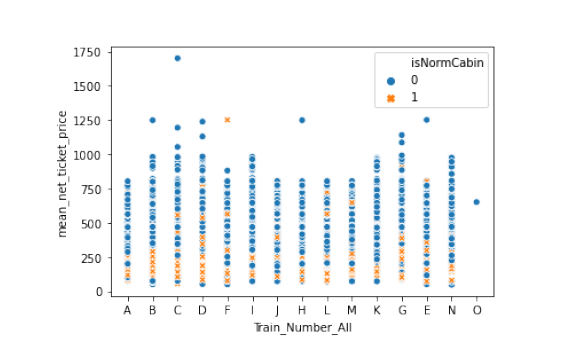

In [10]:
Image(filename="C:/Users/User/Documents/Data3.png", width=410)

Lets explore the distribution better through a Radar Graph

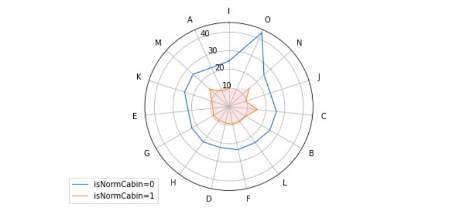

In [88]:
Image(filename="C:/Users/User/Documents/Radar.png", width=410)

#### 1.5 Exploration of ‘Customer_Cat’

There are two Categories for customers: A and B. We use a boxplot to visualize the distribution of mean net ticket prices for A and B customers.

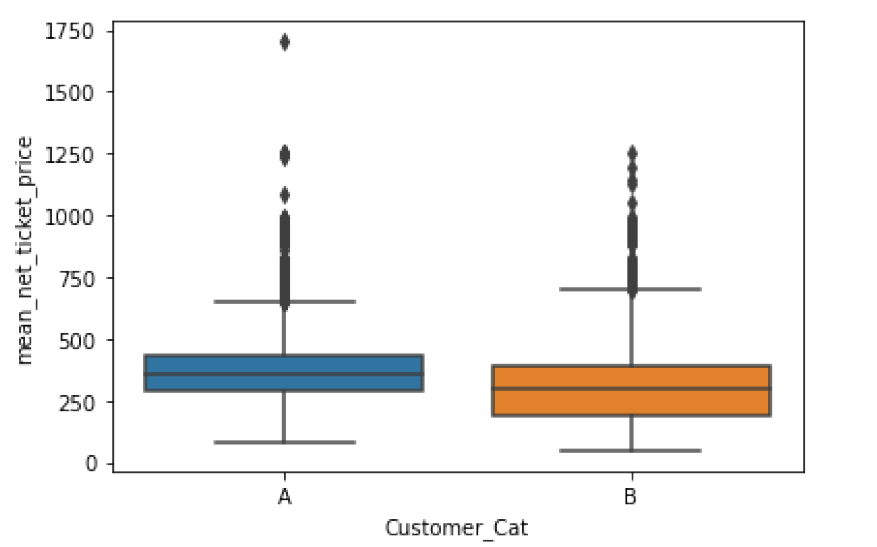

In [11]:
Image(filename="C:/Users/User/Documents/Data4.png", width=410)

The boxplots show that the value of tickets purchased by customers in category A is higher than the value of tickets purchased by customers in category B. Category A may be a kind of “business” or “premium” class of customers.

### 2. Determination of exogeneous / endogeneous variables

Now its time to analyze individually each of the abovementioned variables and derive from the given information whether they are endogenous, or exogenous. We classify each of them below, together with the reasoning and intuition behind it (backed by the EDA performed through the Data Profile Report in the Appendix)

$\bullet$<strong>Culmulative sales</strong> are set to be equal to 1 in our dataframe, therefore this feature will have
absolutely no predictive power. We choose to not include the feature in our model.

$\bullet$The <strong>departure date</strong> is exogeneous. It is defined by advanced and will not be
affected by other variables.
<br>
$\bullet$The <strong>difference between purchase date and departure date</strong> is exogeneous because it is not
affected by other variables.
<br>
$\bullet$We choose not to include the <strong>purchase date</strong> in our model because it would be redundant to add
the three features.

$\bullet$The <strong>train number</strong> is exogeneous. It is defined by advanced and will not be impacted by the other
variables.

$\bullet$The <strong>customer category</strong>  is exogeneous, as it is a personal feature of a customer which is not
affected by the other variables.

$\bullet$The <strong>category of cabin</strong> is endogeneous as someone who hesitates between
the two categories may choose the lower option if the premium cabin is too expensive, or at the
contrary, may choose the premium cabin if it happens to be cheap.

$\bullet$Both <strong>isReturn</strong> and <strong>isOneway </strong>columns are exogeneous because the choice of doing a one way trip or a round trip will not be affected by the other variables (from what we have seen during the EDA shown in the appendix).

Now that we have determined which are the endogenous and exogenous variables, we can countinue with the structural form

### 3. Structural Form

#### High Level Overview of the process

We will take the explanatory variables $x$ which we think are endogenous and test against the error term

### $y_i = \alpha + \beta x_i+ \epsilon_i $ 

For our case, the structural form will be adapting:
<strong>num_seats_total ~ mean_net_ticket_price + train_number + dept_date +  isnormcabin + isreturn +isoneway </strong>
to the abovementioned

When regressing for the endogenous variable, we split the $x$ variation in an explained part, where $\eta$ represents the bad variation in our model: 

### $x_i = \alpha + \pi z_i + \eta_i$

For a valid instrument we would need: 
<br>
$\bullet$ $corr(x_i, z_i) \neq 0$
<br>
$\bullet$ $corr(z_i, \epsilon_i) = 0$
<br>

Afterwards, we take the residuals from the regression $\hat{\eta}$, and regress:

#### $y_i = \alpha + \beta x_i + \delta \hat{\eta_i} + \epsilon_i$

And test for: $H_0 : \delta = 0$ , where rejecting the Null implies endogeneity
<br> 
Good instruments usually have F-Statistic > 20

For our case its more appropriate to check at the significance of residuals, and check if p < 0.05

### 4. Testing for Endogeneity: mean_price_ticket (Hausman Test)

From the results given in the OLS summary we can interpret the significance of the residuals through P > |t|:

$\bullet$ For the mean_net_ticket_price we have P > |t| = 0.01
<br>
$\bullet$ This implies that mean_net_ticket_price is an endogenous variable

### 5. Instrumental Variable Weak Test for Mean_Net_Ticket_Price

We will use the difference between purchase_date and departure_date as an IV for mean_ticket_price, since the variable diff is exogenous and highly correlated with the price
From the results given in the OLS summary we can interpret:

$\bullet$ Very High F-statistic (571.3)
<br>
$\bullet$ Prob (F-statistic): 0.00 

Which indicates that the linear relation between the price and diff is significant, so diff is a good IV


### 6. Housman Test for IsNormCabin

From the results given in the OLS summary we can interpret the significance of the residuals through P > |t|:

$\bullet$ For the mean_net_ticket_price we have P > |t| = 0.02
<br>
$\bullet$ This implies that isNormCabin is an endogenous variable


### 7. Instrumental Variable Weak Test for isNormCabin

We will use the Customer_Cat as an IV for isNormCabin, since the variable Customer_Cat is exogenous and highly correlated with isNormCabin

$\bullet$ High F-statistic: (252.4)
<br>
$\bullet$ Prob (F-statistic): 0.00
<br>

The p-value indicates that Customer_Cat is a good IV for isNormCabin

### 8. 2LS Regression Final Results and Interpretation

# Appendix: Code and Respective Outputs

In [78]:
#Import the necessary python libraries for statistical analysis
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import scipy
from math import pi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import DateTime as dt
#sns.set_theme(style="whitegrid")
#sns.set(rc={'figure.figsize':(11.7,8.27)})

In [62]:
# Import the data and check the first rows of the data
df = pd.read_csv('Data-GP1.csv')
df.head()

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat
0,1,188.663422,10/9/19,10/10/18,A,1,1,0,0,A
1,1,358.428869,5/27/19,6/6/18,B,1,0,1,0,A
2,1,356.372684,5/31/20,6/17/19,B,1,0,1,0,A
3,1,396.370505,12/10/19,12/27/18,C,1,0,1,0,A
4,1,364.264552,5/31/20,6/19/19,B,2,0,1,0,A


In [63]:
df.describe()

,num_seats_total,mean_net_ticket_price,Culmulative_sales,isNormCabin,isReturn,isOneway
count,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000,209697.000000
mean,2.383019,230.116900,15.875063,0.598249,0.480183,0.122873
std,2.083324,147.024784,19.795677,0.490253,0.499608,0.328292
min,1.000000,1.278969,1.000000,0.000000,0.000000,0.000000
25%,1.000000,108.870193,3.000000,0.000000,0.000000,0.000000
50%,2.000000,186.282199,8.000000,1.000000,0.000000,0.000000
75%,3.000000,350.409481,21.000000,1.000000,1.000000,0.000000
max,66.000000,7855.766106,187.000000,1.000000,1.000000,1.000000


In [64]:
# Check completeness
df.isna().any()

num_seats_total          False
mean_net_ticket_price    False
Dept_Date                False
Purchase_Date            False
Train_Number_All         False
Culmulative_sales        False
isNormCabin              False
isReturn                 False
isOneway                 False
Customer_Cat             False
dtype: bool

In [65]:
### Cleaning of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209697 entries, 0 to 209696
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   num_seats_total        209697 non-null  int64  
 1   mean_net_ticket_price  209697 non-null  float64
 2   Dept_Date              209697 non-null  object 
 3   Purchase_Date          209697 non-null  object 
 4   Train_Number_All       209697 non-null  object 
 5   Culmulative_sales      209697 non-null  int64  
 6   isNormCabin            209697 non-null  int64  
 7   isReturn               209697 non-null  int64  
 8   isOneway               209697 non-null  int64  
 9   Customer_Cat           209697 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 16.0+ MB


In [66]:
# Convert the dates to the right data type
df['Dept_Date'] = pd.to_datetime(df['Dept_Date'])
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

In [67]:
### Correct bias of prices
df = df[df['Culmulative_sales'] == 1]
df.describe()

,num_seats_total,mean_net_ticket_price,Culmulative_sales,isNormCabin,isReturn,isOneway
count,29016.000000,29016.000000,29016.0,29016.000000,29016.000000,29016.000000
mean,1.080507,332.601975,1.0,0.310622,0.407982,0.244072
std,0.472506,158.540340,0.0,0.462756,0.491468,0.429543
min,1.000000,47.914888,1.0,0.000000,0.000000,0.000000
25%,1.000000,208.078461,1.0,0.000000,0.000000,0.000000
50%,1.000000,326.299719,1.0,0.000000,0.000000,0.000000
75%,1.000000,404.449773,1.0,1.000000,1.000000,0.000000
max,15.000000,7855.766106,1.0,1.000000,1.000000,1.000000


In [68]:
# Create the feature 'diff' - it reports a number of days
df['diff'] = (df['Dept_Date'] - df['Purchase_Date']).dt.days 

In [69]:
df['diff'].describe()

count    29016.000000
mean        46.675696
std         61.957986
min          0.000000
25%         10.000000
50%         24.000000
75%         53.000000
max        364.000000
Name: diff, dtype: float64

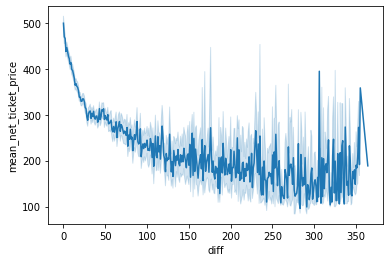

In [70]:
ax = sns.lineplot(x='diff', y='mean_net_ticket_price', data=df)

In [71]:
### Exploration of 'isNormCabin'

In [79]:
graph_df=df.pivot_table(index=['Train_Number_All'],columns=['isNormCabin'],aggfunc='mean')
graph_df['mean_net_ticket_price']

isNormCabin,0,1
Train_Number_All,,
A,393.273948,184.317143
B,398.208968,205.328499
C,407.856722,232.424886
D,405.418576,190.087883
E,380.244438,193.549604
F,378.923827,194.979834
G,403.587608,203.251443
H,386.120241,197.560182
I,400.465609,192.848676


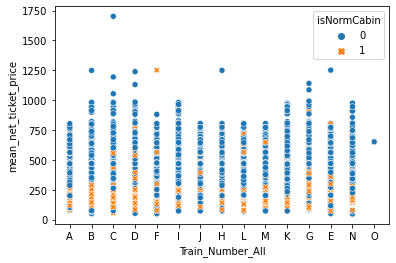

In [80]:
# Let's visualize the mean ticket price per category and whether it's normal cabin
ax = sns.scatterplot(data=df, x="Train_Number_All", y="mean_net_ticket_price", hue="isNormCabin", style="isNormCabin")


In [81]:
# Drop the outlier (point where ticket price is close to 8000)
df = df[df['mean_net_ticket_price']<7000]

In [82]:
### Exploration of 'Customer_Cat'
df.Customer_Cat.unique()

array(['A', 'B'], dtype=object)

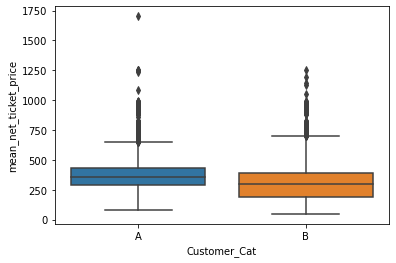

In [83]:
ax = sns.boxplot(x = 'Customer_Cat', y = 'mean_net_ticket_price', data=df)


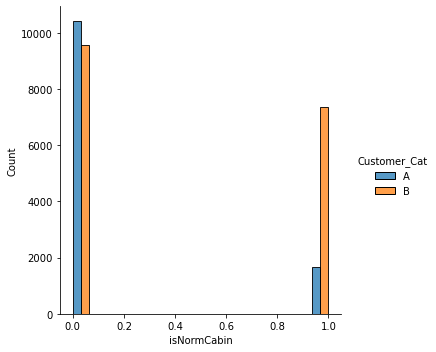

In [84]:
#The boxplots show that the value of tickets bought by customers in category A are higher than the value of tickets bought by customers in category B. Category A may be a kind of "business" or "premium" class of customers.
ax = sns.displot(data=df, x='isNormCabin', hue='Customer_Cat', multiple="dodge")


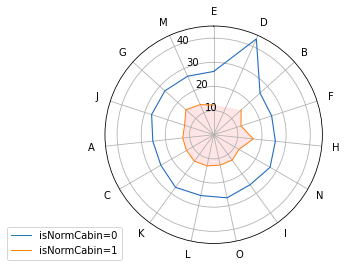

In [85]:
# Let's visualize the mean ticket price per category and whether it's normal cabin
from math import pi
N = len(list(set(df["Train_Number_All"].values)))
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(1)
plt.xticks(angles[:-1], list(set(df['Train_Number_All'].values)))
v0= graph_df['mean_net_ticket_price'][0].values.flatten().tolist()
v0 += v0[:1]
v1 = graph_df['mean_net_ticket_price'][1].values.flatten().tolist()
v1 += v1[:1]
Y = np.vstack((v0,v1))          
Y = Y/np.array(N)
Y = np.hstack((Y, Y[:,0].reshape(2,1)))
ax.plot(np.append(angles,angles[0]), Y[0], linewidth=1, linestyle='solid', label="isNormCabin=0")
ax.plot(np.append(angles,angles[0]), Y[0], 'b', alpha=0.1)
ax.plot(np.append(angles,angles[0]), Y[1], linewidth=1, linestyle='solid', label="isNormCabin=1")
ax.fill(np.append(angles,angles[0]), Y[1], 'r', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1));

We have an outlier in category D. Besides that we have a generally normal distribution of prices.
Majority of normal cabins have a generally lower price.

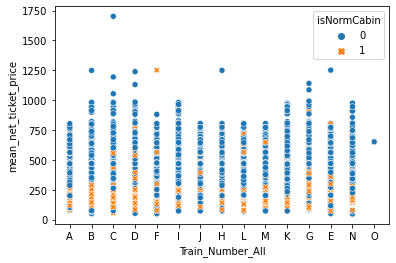

In [59]:
#There is a correlation between columns isNormCabin and Customer_Cat: **normal cabins are much more likely to be occupied by customers from category B**. 
# Let's visualize the mean ticket price per category again to confirm our assumptions
ax = sns.scatterplot(data=df, x="Train_Number_All", y="mean_net_ticket_price", hue="isNormCabin", style="isNormCabin")


In [21]:
# Determination of exogeneous / endogeneous variables
# Print the data profile
# Explore potential correlations, missing values 
profile_report = ProfileReport(df, title="Overall Train Data Profile", explorative=True)
profile_report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
#**Culmulative sales** are set to be equal to 1 in our dataframe, therefore this feature will have absolutely no predictive power. We choose to not include the feature in our model.
df.drop(columns='Culmulative_sales', inplace=True)

In [24]:
#Drop Purchase Date
df.drop(columns='Purchase_Date', inplace=True)

In [25]:
#num_seats_total ~ mean_net_ticket_price + train_number + dept_date +  isnormcabin + isreturn +isoneway 

In [26]:
df = pd.get_dummies(df, columns=['Train_Number_All'])
df = pd.get_dummies(df, columns=['Customer_Cat'])
print(df.columns)

Index(['num_seats_total', 'mean_net_ticket_price', 'Dept_Date', 'isNormCabin',
       'isReturn', 'isOneway', 'diff', 'Train_Number_All_A',
       'Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O', 'Customer_Cat_A',
       'Customer_Cat_B'],
      dtype='object')


In [27]:
y = df['num_seats_total']
X = df[['mean_net_ticket_price',  'isNormCabin',
       'isReturn', 'isOneway', 'Train_Number_All_A',
       'Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        num_seats_total   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.66
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           5.51e-31
Time:                        11:18:29   Log-Likelihood:                -19322.
No. Observations:               29015   AIC:                         3.868e+04
Df Residuals:                   28996   BIC:                         3.884e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.99

In [28]:
# Testing for endogeneity
### mean_price_ticket : hausman test
y = df['mean_net_ticket_price']
X = df[['isReturn', 'isOneway', 'Train_Number_All_A',
       'Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O','Customer_Cat_A',
       'Customer_Cat_B','diff']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
u = results.resid

                              OLS Regression Results                             
Dep. Variable:     mean_net_ticket_price   R-squared:                       0.282
Model:                               OLS   Adj. R-squared:                  0.282
Method:                    Least Squares   F-statistic:                     633.9
Date:                   Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                           11:19:07   Log-Likelihood:            -1.8217e+05
No. Observations:                  29015   AIC:                         3.644e+05
Df Residuals:                      28996   BIC:                         3.645e+05
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [29]:
y = df['num_seats_total']
X = pd.concat([df[['mean_net_ticket_price',  'isNormCabin',
       'isReturn', 'isOneway', 'Train_Number_All_A',
       'Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']]],axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        num_seats_total   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.66
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           5.51e-31
Time:                        11:19:24   Log-Likelihood:                -19322.
No. Observations:               29015   AIC:                         3.868e+04
Df Residuals:                   28996   BIC:                         3.884e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.99

mean price was indeed endogenous

In [30]:
### mean_price_ticket : IV weak test
y = df['mean_net_ticket_price']
X = df[['diff','isReturn', 'isOneway', 'Train_Number_All_A','Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']]
       
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     mean_net_ticket_price   R-squared:                       0.251
Model:                               OLS   Adj. R-squared:                  0.250
Method:                    Least Squares   F-statistic:                     571.3
Date:                   Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                           11:19:55   Log-Likelihood:            -1.8280e+05
No. Observations:                  29015   AIC:                         3.656e+05
Df Residuals:                      28997   BIC:                         3.658e+05
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [31]:
### isNormCabin : hausman test
y = df['isNormCabin']
X = df[['isReturn', 'isOneway', 'Train_Number_All_A',
       'Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O','Customer_Cat_A',
       'Customer_Cat_B','diff']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
u = results.resid

                            OLS Regression Results                            
Dep. Variable:            isNormCabin   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     390.9
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:20:38   Log-Likelihood:                -15661.
No. Observations:               29015   AIC:                         3.136e+04
Df Residuals:                   28996   BIC:                         3.152e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1382      0

In [32]:
y = df['num_seats_total']
X = pd.concat([df[['mean_net_ticket_price',  'isNormCabin',
       'isReturn', 'isOneway', 'Train_Number_All_A',
       'Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']],u],axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        num_seats_total   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.01
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           7.04e-34
Time:                        11:20:52   Log-Likelihood:                -19314.
No. Observations:               29015   AIC:                         3.867e+04
Df Residuals:                   28995   BIC:                         3.883e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.01

Endogenous

In [33]:
### isNormCabin: IV weak test
y = df['isNormCabin']
X = df[['Customer_Cat_A',
       'Customer_Cat_B','isReturn', 'isOneway', 'Train_Number_All_A','Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']]
       
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            isNormCabin   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:21:30   Log-Likelihood:                -16810.
No. Observations:               29015   AIC:                         3.366e+04
Df Residuals:                   28997   BIC:                         3.381e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.998e+11   2.02

In [34]:
# 2LS Regression : first step
y = df['isNormCabin']
X = df[['Customer_Cat_A',
       'Customer_Cat_B','isReturn', 'isOneway', 'Train_Number_All_A','Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']]
       
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
isNormCabin_hat = model.predict(X)

In [35]:
y = df['mean_net_ticket_price']
X = df[['diff','isReturn', 'isOneway', 'Train_Number_All_A','Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']]
       
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
mean_ticket_price_hat = model.predict(X)

In [36]:
# 2LS Regression : second step
y = df['num_seats_total']
X = pd.concat([df[['isOneway', 'Train_Number_All_A','Train_Number_All_B', 'Train_Number_All_C', 'Train_Number_All_D',
       'Train_Number_All_E', 'Train_Number_All_F', 'Train_Number_All_G',
       'Train_Number_All_H', 'Train_Number_All_I', 'Train_Number_All_J',
       'Train_Number_All_K', 'Train_Number_All_L', 'Train_Number_All_M',
       'Train_Number_All_N', 'Train_Number_All_O']],pd.DataFrame(mean_ticket_price_hat,columns=['mean_ticket_price_hat']),pd.DataFrame(isNormCabin_hat,columns=['isNormCabin_hat'])],axis=1)
       
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        num_seats_total   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     30.47
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.65e-98
Time:                        11:22:24   Log-Likelihood:                -19161.
No. Observations:               29015   AIC:                         3.836e+04
Df Residuals:                   28997   BIC:                         3.851e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.69